# 主要城市空气质量分析

## 数据清洗与整理

1. 提取原始数据中各城市的AQI值

2. 去除缺失值

3. 保存到单个文件中。

In [1]:
import numpy as np
import pandas as pd
from pypinyin import lazy_pinyin, Style

In [2]:
# 城市名转化为拼音
def h2p(filename):
    return ''.join(lazy_pinyin(filename.split('.')[0], style=Style.FIRST_LETTER))

In [5]:
import os

path = r'../AQI_maincity'
filename0 = os.listdir(path)[0]
cityname0 = h2p(filename0)
dirname0 = os.path.join(path, filename0)
with open(dirname0) as f:
    data = pd.read_csv(f, usecols=[0,1], index_col='date', encoding='utf-8')
    data.rename(columns={'AQI': cityname0}, inplace=True)

In [6]:
for filename in os.listdir(path)[1:]:
    dirname = os.path.join(path, filename)
    cityname = h2p(filename)
    if os.path.isfile(dirname):
        with open(dirname) as f:
            df = pd.read_csv(f, usecols=[0,1], index_col='date', encoding='utf-8')
            df.rename(columns={'AQI': cityname}, inplace=True)
        data = pd.concat([data, df], axis=1, sort=False)
# idx = pd.to_datetime(data.index, format='%Y-%m-%d')
# data.index = idx
data.index.name = 'date'
print(data.head(3))

             sh   wlmq     lz     bj   nj   nn   nc   hf    heb   tj  ...    \
date                                                                  ...     
2014-01-01  195  196.0  158.0   81.0  177  205  159  166  141.0  131  ...     
2014-01-02  147  184.0   99.0  145.0  209  182  171  220  131.0  146  ...     
2014-01-03  189  248.0   96.0   74.0  255  185  136  205  191.0  109  ...     

              sjz     fz    xn     xa   gy   zz   cq    yc   cc     cs  
date                                                                    
2014-01-01   85.0   75.0  84.0  120.0  139   94  149  72.0   50  195.0  
2014-01-02  205.0   84.0  64.0  117.0  142  113  176  69.0   75  197.0  
2014-01-03  138.0  102.0  85.0   92.0  110   76  209  59.0  118  260.0  

[3 rows x 30 columns]


In [7]:
# 处理缺失值
print('存在缺失值的行数：', data[data.isna().values==True].shape[0])
data.dropna(axis=0, how='any', inplace=True)
print(np.all(data.notna()))

存在缺失值的行数： 29
sh      True
wlmq    True
lz      True
bj      True
nj      True
nn      True
nc      True
hf      True
heb     True
tj      True
ty      True
gz      True
cd      True
ls      True
km      True
hz      True
wh      True
sy      True
jn      True
sz      True
sjz     True
fz      True
xn      True
xa      True
gy      True
zz      True
cq      True
yc      True
cc      True
cs      True
dtype: bool


In [8]:
# 保存文件
data = data.astype(np.int32)
data.to_csv('maincity_aqi.csv', encoding='utf-8')

## 武汉市空气质量

1. 整体情况怎么样？

2. 空气质量是否逐年改善？

3. 与其他城市相比如何？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 问题一：武汉的空气质量怎么样？

1. 描述性统计信息

2. 空气质量指数走势图

3. 空气质量分布情况

In [2]:
wh_data = pd.read_csv('maincity_aqi.csv', usecols=['date','wh'], index_col='date')
wh_data.rename(columns={'wh': 'AQI'}, inplace=True)
idx = pd.to_datetime(wh_data.index, format='%Y-%m-%d')
wh_data.index = idx
wh_data.name = 'wh'
wh_data.head()

,AQI
date,
2014-01-01,203
2014-01-02,231
2014-01-03,224
2014-01-04,147
2014-01-05,195


In [48]:
# 描述性统计信息
wh_data.describe([.25, .5, .75, .95])
# wh_data.skew()
# wh_data.kurt()

,AQI
count,1801.000000
mean,95.240977
std,46.980051
min,0.000000
25%,64.000000
50%,88.000000
75%,114.000000
95%,182.000000
max,500.000000


武汉市AQI均值为95，中位数为88，最小值0，最大值500，有5%的天数AQI在182以上。

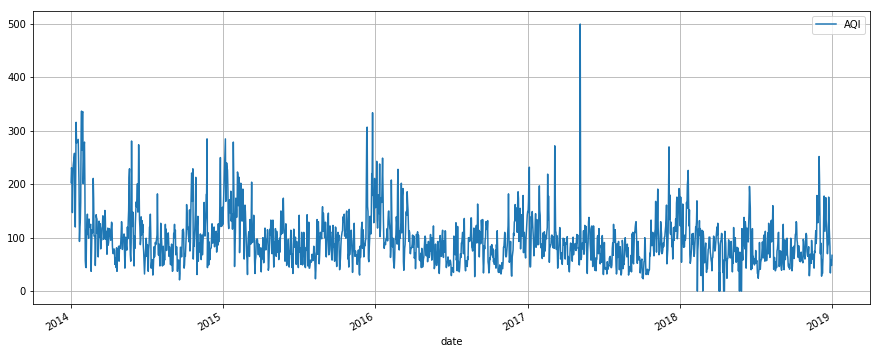

In [67]:
wh_data.plot(figsize=(15,6), grid=True)
plt.show()

从2014年至2018年的AQI走势图也可以看出，武汉市大多时间AQI维持在100左右，但在每年冬天似乎空气质量更差？

In [38]:
# 频数分布
wh_data.AQI.value_counts(bins=10, sort=False)

(-0.501, 50.0]    239
(50.0, 100.0]     891
(100.0, 150.0]    499
(150.0, 200.0]    106
(200.0, 250.0]     43
(250.0, 300.0]     16
(300.0, 350.0]      6
(350.0, 400.0]      0
(400.0, 450.0]      0
(450.0, 500.0]      1
Name: AQI, dtype: int64

In [39]:
# 空气质量等级
def get_grade(aqi):
    if aqi <= 50:
        return 'excellent'
    elif aqi <= 100:
        return 'good'
    elif aqi <= 150:
        return 'mild'
    elif aqi <= 200:
        return 'moderate'
    elif aqi <= 300:
        return 'severe'
    elif aqi <= 500:
        return 'serious'
    else:
        return 'excess'

In [41]:
wh_data['GRADE'] = wh_data.AQI.apply(get_grade)
wh_data.groupby(by='GRADE').count()

,AQI
GRADE,
excellent,239
good,891
mild,499
moderate,106
serious,7
severe,59


最多的是空气质量良，其次是轻度污染。

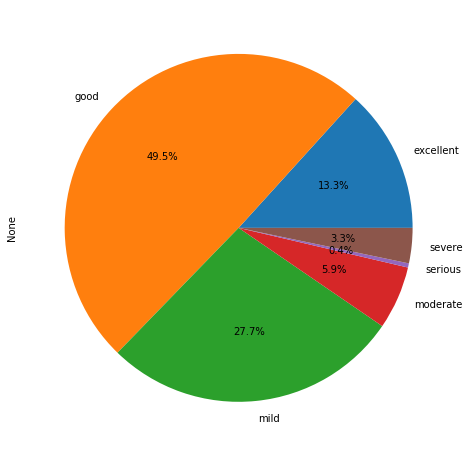

In [43]:
wh_grade_percent = wh_data.groupby(by='GRADE').size() / len(wh_data)
wh_grade_percent.plot.pie(autopct = '%.1f%%', figsize=(8,8))
plt.show()

整体来看，武汉市空气质量似乎良好(90.5%的天数处于150以下)，这在全国处于什么水平？

### 问题二：武汉的空气质量改善了吗？

1. 比较不同年份的空气质量

In [65]:
# str(i)[:4]表示年份
# years = pd.Series([str(i)[:4] for i in wh_data.index]).drop_duplicates().reset_index()
years = [str(i)[:4] for i in wh_data.index]
years_unique = np.unique(years)
wh_data.groupby(by=years).describe()

AQI                                                       
      count        mean        std   min   25%   50%    75%    max
2014  349.0  110.163324  56.413898  21.0  75.0  99.0  126.0  337.0
2015  357.0  102.504202  47.853335  23.0  68.0  96.0  125.0  334.0
2016  365.0   92.665753  41.003257  27.0  62.0  88.0  113.0  249.0
2017  365.0   89.136986  44.608712  23.0  60.0  85.0  107.0  500.0
2018  365.0   82.547945  38.601743   0.0  57.0  77.0  103.0  252.0

从均值和中位数来看，每年空气质量都在改善。

In [49]:
# 按年份分组
wh_years = {f'wh_{year}': wh_data.loc[f'{year}-01-01':f'{year}-12-31',:] for year in years_unique}
wh_years['wh_2018'].head()

,AQI,GRADE
date,,
2018-01-01,122,mild
2018-01-02,176,moderate
2018-01-03,109,mild
2018-01-04,54,good
2018-01-05,104,mild


In [50]:
# 每年的空气质量情况
wh_years_grade = {f'wh_{year}_grade': wh_year.groupby(by="GRADE").size() for year, wh_year in zip(years_unique, wh_years.values())}
wh_years_grade['wh_2018_grade']

GRADE
excellent     62
good         204
mild          79
moderate      16
severe         4
dtype: int64

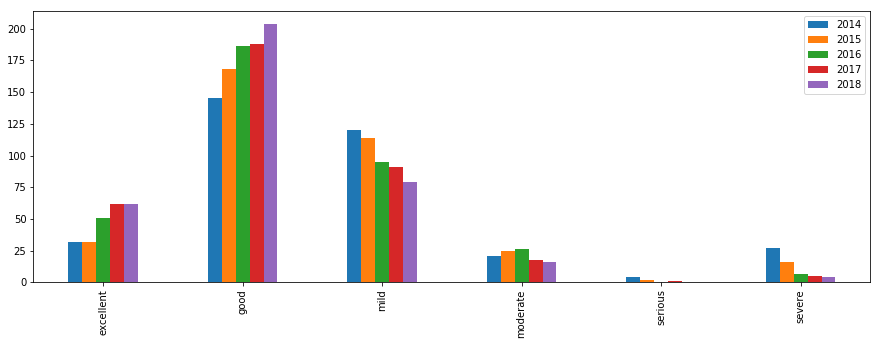

In [51]:
wh_grades = pd.concat(wh_years_grade, axis=1, sort=False).fillna(0).astype(np.int32)
wh_grades.columns = years_unique
wh_grades.plot.bar(figsize=(15,5))
plt.show()

空气质量为优和良的天数逐年增加，武汉空气质量在改善。

### 问题三：武汉市空气质量与其他城市对比

1. 比较武汉市，北京市，上海市，深圳市2018年的空气质量

In [52]:
data_city = pd.read_csv('maincity_aqi.csv', usecols=['date','wh','bj','sh','sz'], index_col='date').loc['2018-01-01':'2018-12-31']
data_city.head()

,sh,bj,wh,sz
date,,,,
2018-01-01,123,60,122,99
2018-01-02,59,49,176,84
2018-01-03,42,29,109,59
2018-01-04,37,44,54,52
2018-01-05,52,69,104,53


In [53]:
data_city.describe()

,sh,bj,wh,sz
count,365.000000,365.000000,365.000000,365.000000
mean,74.213699,91.942466,82.547945,53.528767
std,34.582015,51.537402,38.601743,23.015699
min,0.000000,0.000000,0.000000,0.000000
25%,49.000000,53.000000,57.000000,38.000000
50%,65.000000,80.000000,77.000000,49.000000
75%,90.000000,119.000000,103.000000,63.000000
max,239.000000,294.000000,252.000000,174.000000


从均值和中位数可以看出，深圳市空气质量最好，北京市最差，武汉市排在第三。

In [54]:
for col in data_city.columns:
    data_city[f'{col}_grade'] = data_city.loc[:,col].apply(get_grade)
    
data_city.head()

,sh,bj,wh,sz,sh_grade,bj_grade,wh_grade,sz_grade
date,,,,,,,,
2018-01-01,123,60,122,99,mild,good,mild,good
2018-01-02,59,49,176,84,good,excellent,moderate,good
2018-01-03,42,29,109,59,excellent,excellent,mild,good
2018-01-04,37,44,54,52,excellent,excellent,good,good
2018-01-05,52,69,104,53,good,good,mild,good


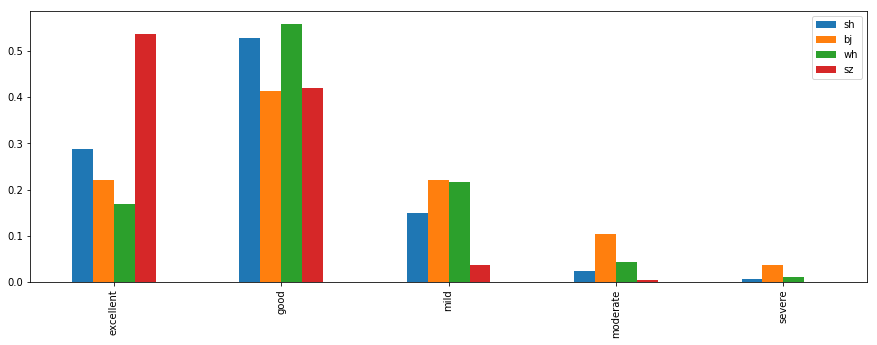

In [55]:
city_percent = [data_city[[f'{col}', f'{col}_grade']].groupby(f'{col}_grade').size() / len(data_city) for col in data_city.columns[:4]]
city_percent = pd.concat(city_percent, axis=1, sort=False)
city_percent.columns = ['sh', 'bj', 'wh', 'sz']
city_percent.plot.bar(figsize=(15,5))
plt.show()

In [56]:
city_percent.loc[['excellent', 'good']].sum().sort_values(ascending=False)

sz    0.956164
sh    0.816438
wh    0.728767
bj    0.635616
dtype: float64

比较AQI<=100的比例，深圳市空气质量最好，武汉市略胜北京。

### 问题四：武汉市一年四季哪个季度空气质量最差？

1. 2017.12-2018.11

In [93]:
wh_winter = wh_data.loc['2017-12-01':'2018-2-28']
wh_spring = wh_data.loc['2018-03-01':'2018-05-31']
wh_summer = wh_data.loc['2018-06-01':'2018-08-31']
wh_fall = wh_data.loc['2018-09-01':'2018-11-30']

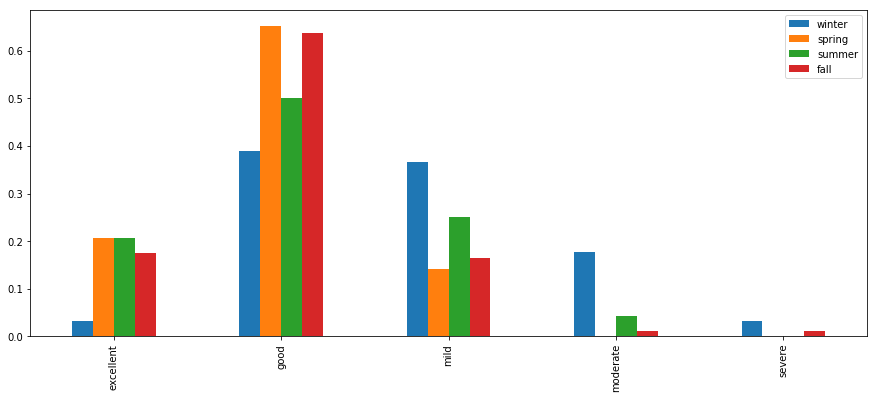

In [94]:
winter_grade = wh_winter.groupby('GRADE').size() / len(wh_winter)
spring_grade = wh_spring.groupby('GRADE').size() / len(wh_spring)
summer_grade = wh_summer.groupby('GRADE').size() / len(wh_summer)
fall_grade = wh_fall.groupby('GRADE').size() / len(wh_fall)

season_grade = pd.concat([winter_grade,spring_grade,summer_grade,fall_grade], axis=1, sort=False)
season_grade.columns = [ 'winter','spring','summer', 'fall']
season_grade.plot.bar(figsize=(15,6))
plt.show()

In [96]:
season_grade.loc[['excellent', 'good']].sum().sort_values(ascending=False)

spring    0.858696
fall      0.813187
summer    0.706522
winter    0.422222
dtype: float64

从统计信息可以看出，确实冬天的空气质量更差。

未完待续...